# Load Libraries & Read in Data

In [1]:
#Load libraries
suppressPackageStartupMessages(library(tximport))
suppressPackageStartupMessages(library(readxl))
suppressPackageStartupMessages(library(ggpubr))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(gdata))

In [2]:
# Color palette
jewels <- c("#81abce", "#8ead98", "#f6bd60", "#f578a0", "#9080a7")

In [3]:
# Read in metadata
meta <- read.delim("Updated_Cornell_Metadata_08072020_KF_20210908.txt", stringsAsFactors = F)

In [4]:
# Creation of new column in order to have the name of the counts(column names) match id's in the meta file
meta$newID = paste(meta$SampleID, "_filtered.human", sep="")
head(meta)
dim(meta)

,SampleID,SampleID_nobatch,Subject,SamplePlate_orig,IncludeInAnalysis,Notes_UPDATE,DeDupList,paired,Replicate,SequencingBatch,⋯,VENT_Total_Ventilation_Orders,VENT_Tracheostomy_Performed,VENT_Tube_Exchange_Performed,VENT_Total_Ventilation_Minutes,VENT_First_Ventilation_Date_RelativeHour,RC_Patient_Age,RC_HISTORY_BMI,RC_HISTORY_Pregnancy,RC_HISTORY_PregnancyWeeks,newID
,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<lgl>,<chr>,<int>,<chr>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>
1,COVSUBJ_0001_1_P_HA,COVSUBJ_0001_1_P,COVSUBJ_0001,P10,TRUE,,TRUE,,1,B2_HA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,COVSUBJ_0001_1_P_HA_filtered.human
2,COVSUBJ_0002_1_N_HA,COVSUBJ_0002_1_N,COVSUBJ_0002,P1,TRUE,,TRUE,,1,B3_HA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,COVSUBJ_0002_1_N_HA_filtered.human
3,COVSUBJ_0003_1_P_HA,COVSUBJ_0003_1_P,COVSUBJ_0003,P1,TRUE,,TRUE,,1,B3_HA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,COVSUBJ_0003_1_P_HA_filtered.human
4,COVSUBJ_0004_1_N_HA,COVSUBJ_0004_1_N,COVSUBJ_0004,P1,TRUE,,FALSE,,1,B3_HA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,COVSUBJ_0004_1_N_HA_filtered.human
5,COVSUBJ_0004_2_N_HA,COVSUBJ_0004_2_N,COVSUBJ_0004,P1,TRUE,,TRUE,,2,B3_HA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,COVSUBJ_0004_2_N_HA_filtered.human
6,COVSUBJ_0005_1_N_HA,COVSUBJ_0005_1_N,COVSUBJ_0005,P1,TRUE,,TRUE,,1,B3_HA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,COVSUBJ_0005_1_N_HA_filtered.human


[1] 732  83

In [5]:
table(meta$Type, useNA = "ifany")


               High                 Low              Medium                None 
                 64                  54                 103                 429 
OtherViralInfection 
                 82 

# Load in VAF Analysis

In [6]:
load("merged_rnaedits_filtered_5percent.RData")

In [7]:
colnames(edits_filt)
head(edits_filt$Tumor_Sample_Barcode)

[1] "Hugo_Symbol"                   "Entrez_Gene_Id"               
  [3] "Center"                        "NCBI_Build"                   
  [5] "Chromosome"                    "Start_Position"               
  [7] "End_Position"                  "Variant_Classification"       
  [9] "Variant_Type"                  "Reference_Allele"             
 [11] "Tumor_Seq_Allele1"             "Tumor_Seq_Allele2"            
 [13] "dbSNP_RS"                      "dbSNP_Val_Status"             
 [15] "Tumor_Sample_Barcode"          "Matched_Norm_Sample_Barcode"  
 [17] "Match_Norm_Seq_Allele1"        "Match_Norm_Seq_Allele2"       
 [19] "Tumor_Validation_Allele1"      "Tumor_Validation_Allele2"     
 [21] "Match_Norm_Validation_Allele1" "Match_Norm_Validation_Allele2"
 [23] "Verification_Status"           "Validation_Status"            
 [25] "Mutation_Status"               "Sequencing_Phase"             
 [27] "Sequence_Source"               "Validation_Method"            
 [29] "Score"                         "BAM_File"                     
 [31] "Sequencer"                     "Tumor_Sample_UUID"            
 [33] "Matched_Norm_Sample_UUID"      "HGVSc"                        
 [35] "HGVSp"                         "HGVSp_Short"                  
 [37] "Transcript_ID"                 "Exon_Number"                  
 [39] "t_depth"                       "t_ref_count"                  
 [41] "t_alt_count"                   "n_depth"                      
 [43] "n_ref_count"                   "n_alt_count"                  
 [45] "all_effects"                   "Allele"                       
 [47] "Gene"                          "Feature"                      
 [49] "Feature_type"                  "Consequence"                  
 [51] "cDNA_position"                 "CDS_position"                 
 [53] "Protein_position"              "Amino_acids"                  
 [55] "Codons"                        "Existing_variation"           
 [57] "ALLELE_NUM"                    "DISTANCE"                     
 [59] "STRAND_VEP"                    "SYMBOL"                       
 [61] "SYMBOL_SOURCE"                 "HGNC_ID"                      
 [63] "BIOTYPE"                       "CANONICAL"                    
 [65] "CCDS"                          "ENSP"                         
 [67] "SWISSPROT"                     "TREMBL"                       
 [69] "UNIPARC"                       "RefSeq"                       
 [71] "SIFT"                          "PolyPhen"                     
 [73] "EXON"                          "INTRON"                       
 [75] "DOMAINS"                       "AF"                           
 [77] "AFR_AF"                        "AMR_AF"                       
 [79] "ASN_AF"                        "EAS_AF"                       
 [81] "EUR_AF"                        "SAS_AF"                       
 [83] "AA_AF"                         "EA_AF"                        
 [85] "CLIN_SIG"                      "SOMATIC"                      
 [87] "PUBMED"                        "MOTIF_NAME"                   
 [89] "MOTIF_POS"                     "HIGH_INF_POS"                 
 [91] "MOTIF_SCORE_CHANGE"            "IMPACT"                       
 [93] "PICK"                          "VARIANT_CLASS"                
 [95] "TSL"                           "HGVS_OFFSET"                  
 [97] "PHENO"                         "MINIMISED"                    
 [99] "ExAC_AF"                       "ExAC_AF_AFR"                  
[101] "ExAC_AF_AMR"                   "ExAC_AF_EAS"                  
[103] "ExAC_AF_FIN"                   "ExAC_AF_NFE"                  
[105] "ExAC_AF_OTH"                   "ExAC_AF_SAS"                  
[107] "GENE_PHENO"                    "FILTER"                       
[109] "flanking_bps"                  "vcf_id"                       
[111] "vcf_qual"                      "ExAC_AF_Adj"                  
[113] "ExAC_AC_AN_Adj"                "ExAC_AC_AN"                   
[115] "ExAC_

[1] "COVSUBJ_0001_1_P_HA" "COVSUBJ_0001_1_P_HA" "COVSUBJ_0001_1_P_HA"
[4] "COVSUBJ_0001_1_P_HA" "COVSUBJ_0001_1_P_HA" "COVSUBJ_0001_1_P_HA"

In [8]:
# Filter out inconsistent samples
ignore_samples <- c("COVSUBJ_0137_1_N_HA", "COVSUBJ_0146_1_N_HA", "COVSUBJ_0376_1_N_HA", 
                    "COVSUBJ_0461_1_N_HA", "COVSUBJ_0558_1_N_HA", "COVSUBJ_0619_1_N_HA")
edits_filt <- subset(edits_filt, !(Tumor_Sample_Barcode %in% ignore_samples))

# Subset RNA Editing data to only include VAF
ADAR_sub <- edits_filt[, c("Matched_Norm_Sample_Barcode", "VAF")] 
head(ADAR_sub)
dim(ADAR_sub)

,Matched_Norm_Sample_Barcode,VAF
,<chr>,<dbl>
1,COVSUBJ_0001_1_P_HA_filtered.human,0.3846154
2,COVSUBJ_0001_1_P_HA_filtered.human,0.6000000
3,COVSUBJ_0001_1_P_HA_filtered.human,0.4166667
4,COVSUBJ_0001_1_P_HA_filtered.human,0.6250000
5,COVSUBJ_0001_1_P_HA_filtered.human,0.7142857
6,COVSUBJ_0001_1_P_HA_filtered.human,0.3076923


[1] 2560455       2

In [9]:
# Create df to store mean VAF
mean_df <- setNames(data.frame(matrix(ncol = 2, nrow = 0)), c("Samples", "VAF_mean"))
mean_df

# Determine how many unique samples 
sample_name <- unique(ADAR_sub$Matched_Norm_Sample_Barcode)

# Calculate mean VAF per unique sample
for (i in sample_name){
    mean_df[nrow(mean_df) + 1,] <- c(i, mean(ADAR_sub$VAF[ADAR_sub$Matched_Norm_Sample_Barcode==i]))
}

Samples,VAF_mean
<lgl>,<lgl>


In [10]:
# Merge metadata to mean_df 
VAF_df <- merge(meta, mean_df, by.x = "newID", by.y = "Samples")
dim(VAF_df)

[1] 695  84

In [11]:
# Convert VAF_mean to numeric
VAF_df$VAF_mean <- as.numeric(as.character(VAF_df$VAF_mean))  

# Reorder X-Axis
VAF_df$Type <- factor(VAF_df$Type, levels=c("None", "Low", "Medium", "High", "OtherViralInfection"))

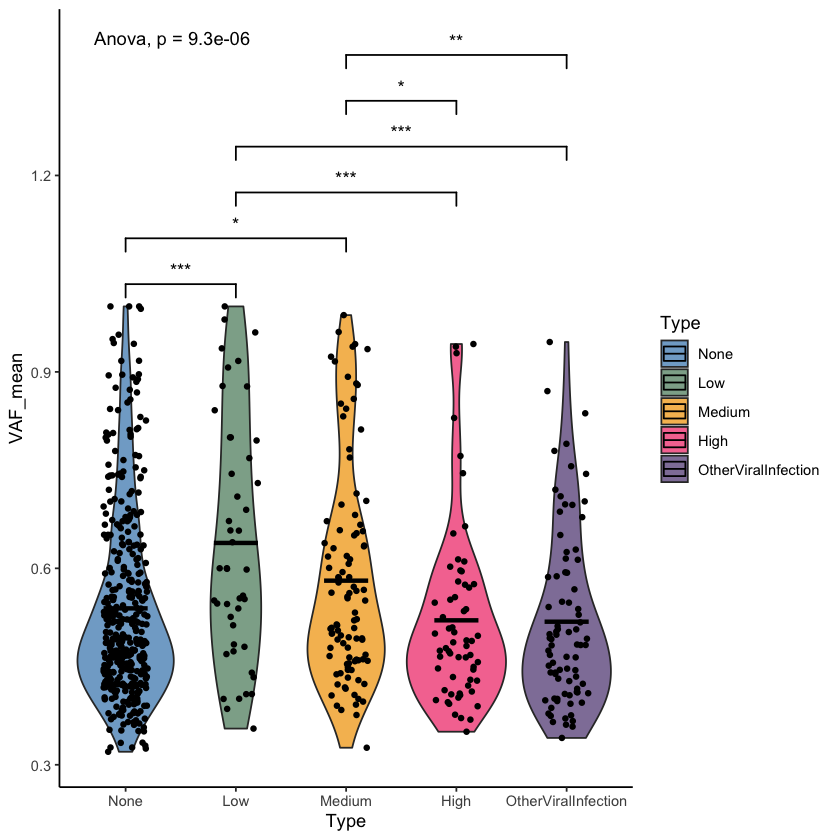

In [12]:
p <- ggplot(VAF_df, aes(x=Type, y=VAF_mean, fill=Type)) + 
geom_violin() + stat_compare_means(method = "anova", label.y = 1.4) + 
geom_jitter(shape=16, position=position_jitter(0.2)) + scale_fill_manual(values = jewels) + 
theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) + stat_summary(fun = "mean", 
        geom = "crossbar", width = 0.4, colour = "black") + 
geom_signif(comparisons = list(c("None", "Low"), c("None", "Medium"),
                              c("Low", "High"), c("Low", "OtherViralInfection"),
                              c("Medium", "High"), c("Medium", "OtherViralInfection")), 
                            y_position = c(1.0, 1.07, 1.14, 1.21, 1.28, 1.35, 1.42), map_signif_level = TRUE)
p

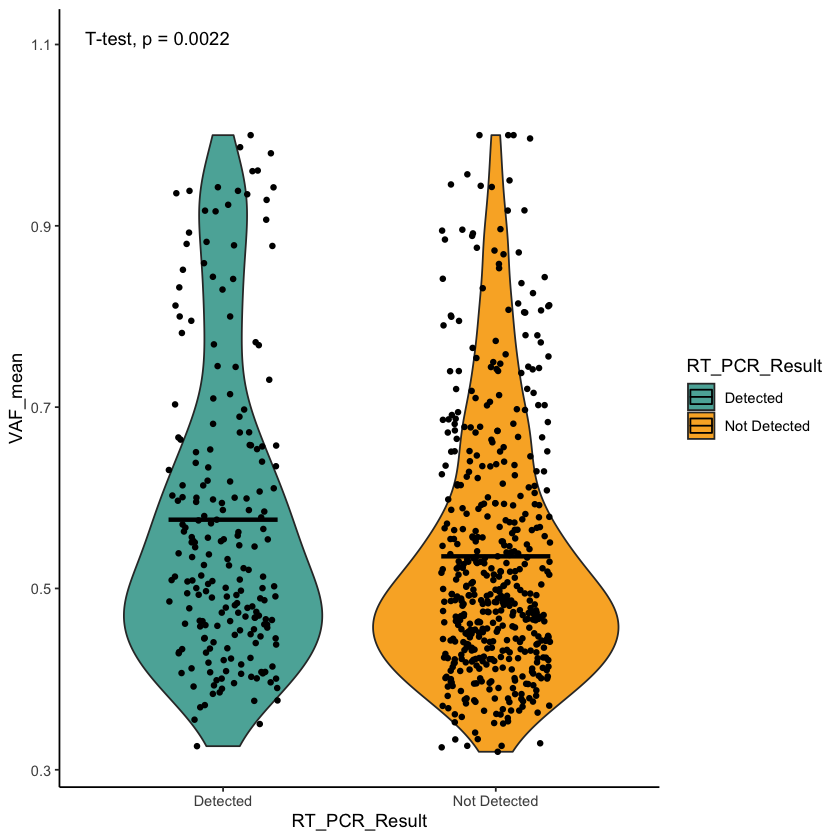

In [13]:
p <- ggplot(VAF_df, aes(x=RT_PCR_Result, y=VAF_mean, fill=RT_PCR_Result)) + geom_violin() + 
stat_compare_means(method = "t.test", label.x = 0.6, label.y = 1.1) + geom_jitter(shape=16, position=position_jitter(0.2)) + 
scale_fill_manual(values = c('#5bb0a7', '#f9b12e')) + 
theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +   stat_summary(fun = "mean",
               geom = "crossbar", 
               width = 0.4,
               colour = "black")

p

In [14]:
# pdf("20230209_Type_VAF-Mean.pdf")

# p <- ggplot(VAF_df, aes(x=Type, y=VAF_mean, fill=Type)) + 
# geom_violin() + stat_compare_means(method = "anova", label.y = 1.4) + 
# geom_jitter(shape=16, position=position_jitter(0.2)) + scale_fill_manual(values = jewels) + 
# theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
# panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) + stat_summary(fun = "mean", 
#         geom = "crossbar", width = 0.4, colour = "black") + 
# geom_signif(comparisons = list(c("None", "Low"), c("None", "Medium"),
#                               c("Low", "High"), c("Low", "OtherViralInfection"),
#                               c("Medium", "High"), c("Medium", "OtherViralInfection")), 
#                             y_position = c(1.0, 1.07, 1.14, 1.21, 1.28, 1.35, 1.42), map_signif_level = TRUE)
# p

# dev.off()

In [15]:
# pdf("20230209_Det_VAF-Mean.pdf")
# p <- ggplot(VAF_df, aes(x=RT_PCR_Result, y=VAF_mean, fill=RT_PCR_Result)) + geom_violin() + 
# stat_compare_means(method = "t.test", label.x = 0.6, label.y = 1.1) + geom_jitter(shape=16, position=position_jitter(0.2)) + 
# scale_fill_manual(values = c("#67c2a4", "#fc8e62")) + 
# theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
# panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +   stat_summary(fun = "mean",
#                geom = "crossbar", 
#                width = 0.4,
#                colour = "black")

# p

# dev.off()

In [16]:
sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Big Sur/Monterey 10.16

Matrix products: default
BLAS/LAPACK: /Users/mollyhuang/opt/miniconda3/envs/bulk_rnaseq/lib/libopenblasp-r0.3.20.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] gdata_2.18.0    dplyr_1.0.9     ggpubr_0.4.0    ggplot2_3.3.6  
[5] readxl_1.4.0    tximport_1.22.0

loaded via a namespace (and not attached):
 [1] cellranger_1.1.0  pillar_1.7.0      compiler_4.1.3    base64enc_0.1-3  
 [5] tools_4.1.3       digest_0.6.29     uuid_1.1-0        jsonlite_1.8.0   
 [9] evaluate_0.15     lifecycle_1.0.1   tibble_3.1.7      gtable_0.3.0     
[13] pkgconfig_2.0.3   rlang_1.0.2       DBI_1.1.2         IRdisplay_1.1    
[17] cli_3.3.0         IRkernel_1.3      fastmap_1.1.0     withr_2.5.0      
[21] repr_1.1.4        gtools